In [17]:
import h5py
import numpy as np
import time

# Start timer
start_time = time.time()

# Load data from h5 file
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Determine the dimensions of the larger matrix
max_x = int(np.max(X_coords)) + 1
max_y = int(np.max(Y_coords)) + 1

# Calculate the midpoint for splitting
mid_x = max_x // 2
mid_y = max_y // 2

# Split the data into four quadrants based on X and Y coordinates
quadrant_1_indices = (X_coords < mid_x) & (Y_coords < mid_y)
quadrant_1 = ebsd_data[quadrant_1_indices]
X_coords_1 = X_coords[quadrant_1_indices]
Y_coords_1 = Y_coords[quadrant_1_indices]

# Flatten each image and concatenate them into a single dataset for clustering
num_images_1, img_height, img_width = quadrant_1.shape
flattened_images_1 = quadrant_1.reshape(num_images_1, -1)

# End timer
end_time = time.time()
print(f"Data loading and preprocessing took {end_time - start_time:.2f} seconds")

Data loading and preprocessing took 1.31 seconds


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import json
import time

# Start timer
start_time = time.time()

# Perform K-means clustering on the selected quadrant
num_clusters = 35  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels_1 = kmeans.fit_predict(flattened_images_1)

# Calculate evaluation metrics
silhouette_avg = silhouette_score(flattened_images_1, cluster_labels_1)
calinski_harabasz_avg = calinski_harabasz_score(flattened_images_1, cluster_labels_1)
davies_bouldin_avg = davies_bouldin_score(flattened_images_1, cluster_labels_1)
inertia = kmeans.inertia_

# Save results to JSON file
results = {
    "silhouette_score": silhouette_avg,
    "calinski_harabasz_score": calinski_harabasz_avg,
    "davies_bouldin_score": davies_bouldin_avg,
    "inertia": inertia,
    "cluster_centers": kmeans.cluster_centers_.tolist(),
    "labels": cluster_labels_1.tolist()
}

with open('clustering_results_quadrant_1.json', 'w') as json_file:
    json.dump(results, json_file, indent=4)

# End timer
end_time = time.time()
print(f"Clustering and metric calculation took {end_time - start_time:.2f} seconds")

Clustering and metric calculation took 14.46 seconds


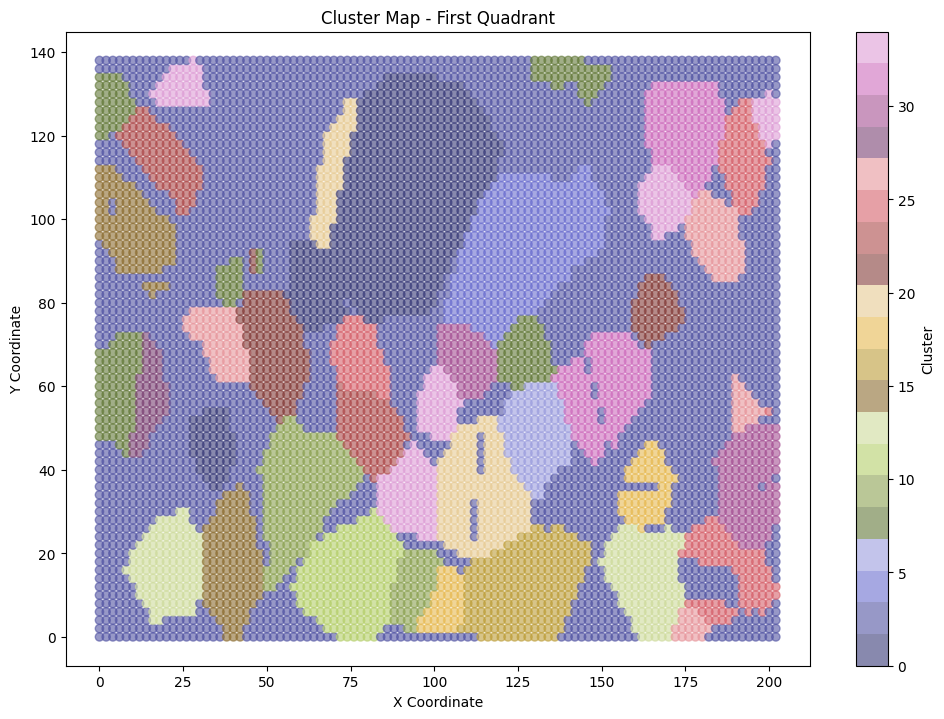

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define a colormap with enough distinct colors
cmap = plt.get_cmap('tab20b')  # 'tab20b' has 20 distinct colors

# Calculate the aspect ratio
aspect_ratio = mid_y / mid_x

# Adjust the figure size based on the aspect ratio
fig_width = 12
fig_height = fig_width * aspect_ratio

# Create the plot
plt.figure(figsize=(fig_width, fig_height))
scatter = plt.scatter(X_coords_1, Y_coords_1, c=cluster_labels_1, cmap=cmap, alpha=0.6)
plt.title('Cluster Map - First Quadrant')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(scatter, label='Cluster')
plt.show()

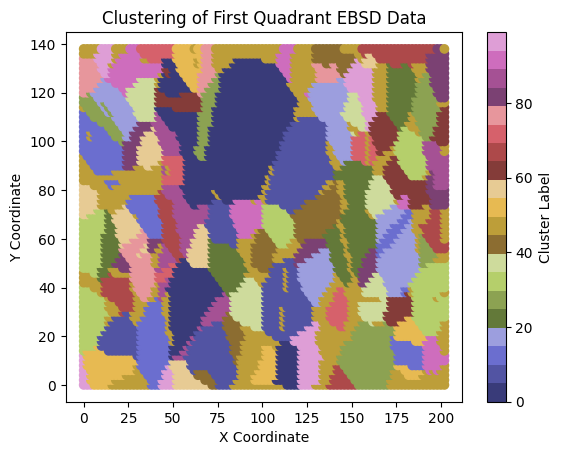

Cluster 0: 544 patterns
Cluster 1: 71 patterns
Cluster 2: 110 patterns
Cluster 3: 56 patterns
Cluster 4: 180 patterns
Cluster 5: 62 patterns
Cluster 6: 253 patterns
Cluster 7: 167 patterns
Cluster 8: 76 patterns
Cluster 9: 128 patterns
Cluster 10: 34 patterns
Cluster 11: 107 patterns
Cluster 12: 125 patterns
Cluster 13: 44 patterns
Cluster 14: 60 patterns
Cluster 15: 144 patterns
Cluster 16: 50 patterns
Cluster 17: 74 patterns
Cluster 18: 80 patterns
Cluster 19: 73 patterns
Cluster 20: 86 patterns
Cluster 21: 49 patterns
Cluster 22: 83 patterns
Cluster 23: 72 patterns
Cluster 24: 134 patterns
Cluster 25: 130 patterns
Cluster 26: 70 patterns
Cluster 27: 41 patterns
Cluster 28: 67 patterns
Cluster 29: 57 patterns
Cluster 30: 71 patterns
Cluster 31: 117 patterns
Cluster 32: 79 patterns
Cluster 33: 61 patterns
Cluster 34: 78 patterns
Cluster 35: 49 patterns
Cluster 36: 57 patterns
Cluster 37: 77 patterns
Cluster 38: 59 patterns
Cluster 39: 35 patterns
Cluster 40: 59 patterns
Cluster 41: 46

In [28]:
import h5py
import numpy as np
import kikuchipy as kp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Load the EBSD data using h5py
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Step 2: Determine the dimensions and split the data into quadrants
max_x = int(np.max(X_coords)) + 1
max_y = int(np.max(Y_coords)) + 1
mid_x = max_x // 2
mid_y = max_y // 2

# Extract the first quadrant
quadrant_1_indices = (X_coords < mid_x) & (Y_coords < mid_y)
quadrant_1 = ebsd_data[quadrant_1_indices]
X_coords_1 = X_coords[quadrant_1_indices]
Y_coords_1 = Y_coords[quadrant_1_indices]

# Step 3: Flatten each image and concatenate them into a single dataset for clustering
num_images_1, img_height, img_width = quadrant_1.shape
flattened_images_1 = quadrant_1.reshape(num_images_1, -1)

# Step 4: Perform clustering (e.g., K-means)
n_clusters = 100  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_images_1)
labels = kmeans.labels_

cmap_custom= plt.get_cmap('tab20b')

# Step 5: Visualize the clustering results
# Create a scatter plot of the coordinates colored by cluster labels
plt.scatter(X_coords_1, Y_coords_1, c=labels, cmap=cmap_custom, marker='o')
plt.colorbar(label='Cluster Label')
plt.title('Clustering of First Quadrant EBSD Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Optionally, analyze the clusters
for cluster_idx in range(n_clusters):
    cluster_patterns = flattened_images_1[labels == cluster_idx]
    print(f"Cluster {cluster_idx}: {cluster_patterns.shape[0]} patterns")

In [3]:
import h5py
import numpy as np
import kikuchipy as kp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the EBSD data using h5py
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Step 2: Determine the dimensions and split the data into quadrants
max_x = int(np.max(X_coords)) + 1
max_y = int(np.max(Y_coords)) + 1
mid_x = max_x // 2
mid_y = max_y // 2

# Extract the first quadrant
quadrant_1_indices = (X_coords < mid_x) & (Y_coords < mid_y)
quadrant_1 = ebsd_data[quadrant_1_indices]
X_coords_1 = X_coords[quadrant_1_indices]
Y_coords_1 = Y_coords[quadrant_1_indices]


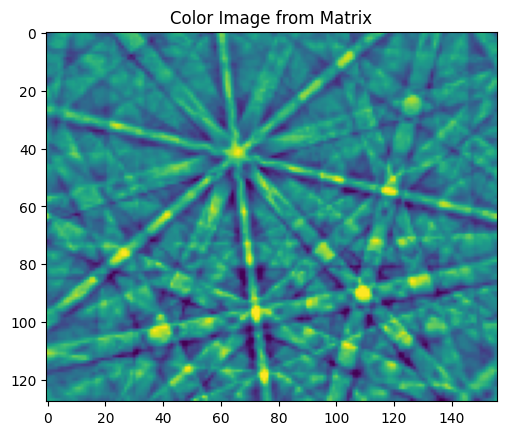

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample 5x5x3 matrix (5x5 image with RGB channels)
matrix = quadrant_1[1]

# Display the color image
plt.imshow(matrix)
plt.title("Color Image from Matrix")
plt.show()

print(type(matrix))
print(type(quadrant_1[1]))


In [29]:
def norm_dot(img1, img2):
    """
    return normalized dot product of the arrays img1, img2
    """
    # make 1D value lists
    v1 = np.ravel(quadrant_1[1])
    v2 = np.ravel(quadrant_1[2])
    
    # get the norms of the vectors
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)
    #print('norms of NDP vectors: ', norm1, norm2)

    ndot = np.dot( v1/norm1, v2/norm2)
    return ndot


def norm_data(data):
    """
    normalize data to have mean=0 and standard_deviation=1
    """
    mean_data=np.mean(data)
    std_data=np.std(data, ddof=1)
    #return (data-mean_data)/(std_data*np.sqrt(data.size-1))
    return (data-mean_data)/(std_data)
    

def ncc(data0, data1):
    """ 
    normalized cross-correlation coefficient between two data sets
    
    Parameters
    ----------
    data0, data1 :  numpy arrays of same size
    """
    return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))

def print_similarity_measures(img1, img2, nc0=None, nd0=None):
    nd = norm_dot(img1, img2)
    nc = ncc(img1, img2)
    print('NCC: ', nc, ' NDP: ', nd)
    if not ((nc0 is None) or (nd0 is None)): 
        print('dNCC: ', nc-nc0, ' dNDP: ', nd-nd0)


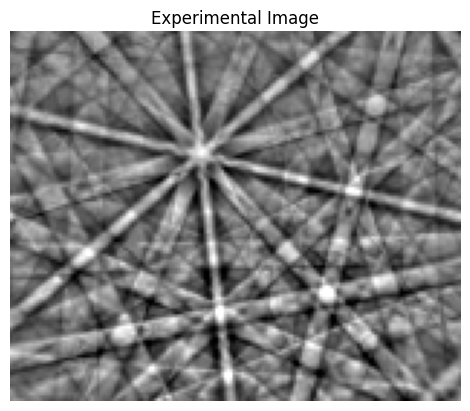

(128, 156) uint8
NCC:  1.0000000000000002  NDP:  0.9981057276232576


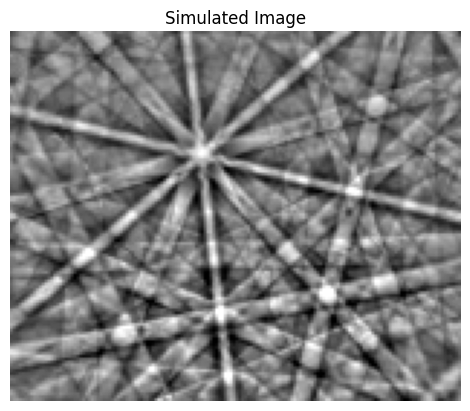

(128, 156) uint8
NCC:  1.0000000000000004  NDP:  0.9981057276232576
NCC:  0.9834984183439163
NIP:  0.9981057276232576


In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load images
img_exp = quadrant_1[1]
img_sim = quadrant_1[2]

# Plot images using matplotlib
def plot_image_with_matplotlib(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot and print details for the first image
plot_image_with_matplotlib(img_exp, 'Experimental Image')
print(img_exp.shape, img_exp.dtype)
print_similarity_measures(img_exp, img_exp)

# Plot and print details for the second image
plot_image_with_matplotlib(img_sim, 'Simulated Image')
print(img_sim.shape, img_sim.dtype)
print_similarity_measures(img_sim, img_sim)

# initial images
test_exp = img_exp
test_sim = img_sim
ndot_0 = norm_dot(test_exp, test_sim)
ncc_0  = ncc(test_exp,test_sim)
print('NCC: ', ncc_0)
print('NIP: ', ndot_0)

Centroids (in coordinate space): [[ 90.5         84.5       ]
 [ 64.33802795  83.54929352]
 [122.28112793  90.77108765]
 [ 54.05454636 113.47272491]
 [146.03390503  53.72881317]
 [176.49295044  55.11267471]
 [ 48.77777863  66.18518829]
 [ 48.          28.94736862]
 [162.32380676  12.70476151]
 [113.74073792  34.14814758]
 [121.65413666  10.75187969]
 [ 73.28125     12.96875   ]
 [194.25640869  36.3418808 ]
 [109.93442535  66.55738068]
 [ 39.70491791  17.16393471]
 [  9.83838367  98.        ]
 [  5.64102554  59.43589783]
 [178.32940674 120.47058868]
 [  8.1860466    6.83720922]
 [ 34.          45.65384674]
 [153.08332825  83.94444275]
 [131.2749939   45.79999924]
 [  5.58620691  27.06896591]
 [ 79.43478394  65.30434418]
 [ 24.52173996 110.43478394]
 [126.96551514  67.86206818]
 [183.48936462  17.87234116]
 [163.78947449  35.78947449]
 [ 14.97959137  57.34693909]
 [193.         102.        ]
 [123.01818085 129.34545898]
 [144.42553711 101.82978821]
 [ 88.20689392  35.58620834]
 [ 60.3258

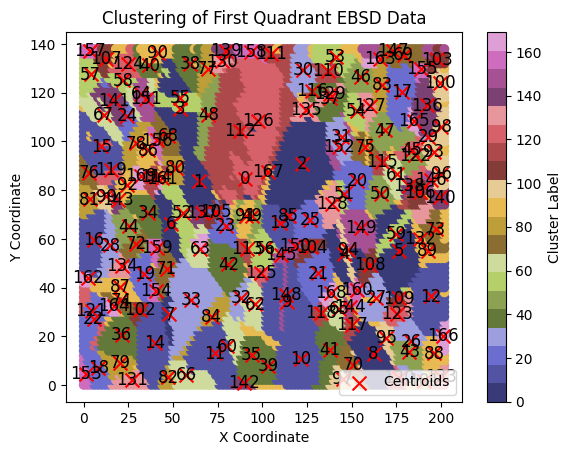

Cluster 0: 4 patterns
Mean pattern for cluster 0: [ 59.75  74.5  107.5  ... 122.5  116.   109.25]
Mean NCC for cluster 0: 0.7907724029339187
Cluster 1: 71 patterns
Mean pattern for cluster 1: [ 93.85915493  96.1971831  102.6056338  ... 121.43661972 123.47887324
 120.87323944]
Mean NCC for cluster 1: 0.9156983832608777
Cluster 2: 249 patterns
Mean pattern for cluster 2: [ 86.08835341 128.40562249 152.53413655 ... 101.23694779 106.35742972
 121.52610442]
Mean NCC for cluster 2: 0.968089945179109
Cluster 3: 110 patterns
Mean pattern for cluster 3: [120.29090909 112.91818182 103.14545455 ...  59.02727273  55.29090909
  76.86363636]
Mean NCC for cluster 3: 0.962697126299128
Cluster 4: 59 patterns
Mean pattern for cluster 4: [107.49152542 104.81355932 103.57627119 ... 133.33898305 140.16949153
 127.25423729]
Mean NCC for cluster 4: 0.948093478696421
Cluster 5: 142 patterns
Mean pattern for cluster 5: [152.13380282 147.94366197 128.06338028 ...  69.46478873  83.33098592
  94.18309859]
Mean NC

In [3]:
import h5py
import numpy as np
import kikuchipy as kp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def norm_data(data):
    """ Normalize data to have mean=0 and standard_deviation=1 """
    mean_data = np.mean(data)
    std_data = np.std(data, ddof=1)
    return (data - mean_data) / std_data

def ncc(data0, data1):
    """ Normalized cross-correlation coefficient between two data sets """
    return (1.0 / (data0.size - 1)) * np.sum(norm_data(data0) * norm_data(data1))

# Step 1: Load the EBSD data using h5py
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Step 2: Determine the dimensions and split the data into quadrants
max_x = int(np.max(X_coords)) + 1
max_y = int(np.max(Y_coords)) + 1
mid_x = max_x // 2
mid_y = max_y // 2

# Extract the first quadrant
quadrant_1_indices = (X_coords < mid_x) & (Y_coords < mid_y)
quadrant_1 = ebsd_data[quadrant_1_indices]
X_coords_1 = X_coords[quadrant_1_indices]
Y_coords_1 = Y_coords[quadrant_1_indices]

# Step 3: Flatten each image and concatenate them into a single dataset for clustering
num_images_1, img_height, img_width = quadrant_1.shape
flattened_images_1 = quadrant_1.reshape(num_images_1, -1)

# Step 4: Perform clustering (e.g., K-means)
n_clusters = 170  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_images_1)
labels = kmeans.labels_

# Calculate the centroids in the coordinate space
centroids_coords = np.zeros((n_clusters, 2))
for cluster_idx in range(n_clusters):
    cluster_indices = labels == cluster_idx
    centroids_coords[cluster_idx, 0] = np.mean(X_coords_1[cluster_indices])
    centroids_coords[cluster_idx, 1] = np.mean(Y_coords_1[cluster_indices])

# Print the centroids
print("Centroids (in coordinate space):", centroids_coords)

# Step 5: Visualize the clustering results
cmap_custom = plt.get_cmap('tab20b')

# Create a scatter plot of the coordinates colored by cluster labels
plt.scatter(X_coords_1, Y_coords_1, c=labels, cmap=cmap_custom, marker='o')
plt.colorbar(label='Cluster Label')

# Plot the centroids
plt.scatter(centroids_coords[:, 0], centroids_coords[:, 1], color='red', marker='x', s=100, label='Centroids')

# Annotate the centroids with their cluster indices
for i, (x, y) in enumerate(centroids_coords):
    plt.text(x, y, str(i), color='black', fontsize=12, ha='center', va='center')

plt.title('Clustering of First Quadrant EBSD Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

# Step 6: Iterate over each cluster and analyze the clusters
for cluster_idx in range(n_clusters):
    cluster_patterns = flattened_images_1[labels == cluster_idx]
    print(f"Cluster {cluster_idx}: {cluster_patterns.shape[0]} patterns")
    
    # Perform any desired analysis or operations on cluster_patterns
    # For example, you can calculate the mean pattern of the cluster
    mean_pattern = np.mean(cluster_patterns, axis=0)
    print(f"Mean pattern for cluster {cluster_idx}: {mean_pattern}")
    
    # Calculate the NCC for each pattern in the cluster with the centroid
    centroid_pattern = kmeans.cluster_centers_[cluster_idx]
    ncc_values = [ncc(centroid_pattern, pattern) for pattern in cluster_patterns]
    mean_ncc = np.mean(ncc_values)
    print(f"Mean NCC for cluster {cluster_idx}: {mean_ncc}")
    
    # You can also visualize the mean pattern if needed
    # plt.imshow(mean_pattern.reshape(img_height, img_width), cmap='gray')
    # plt.title(f'Mean Pattern for Cluster {cluster_idx}')
    # plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Load the EBSD data using h5py
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Step 2: Determine the dimensions and split the data into quadrants
max_x = int(np.max(X_coords)) + 1
max_y = int(np.max(Y_coords)) + 1
mid_x = max_x // 2
mid_y = max_y // 2

# Extract the first quadrant
quadrant_1_indices = (X_coords < mid_x) & (Y_coords < mid_y)
quadrant_1 = ebsd_data[quadrant_1_indices]
X_coords_1 = X_coords[quadrant_1_indices]
Y_coords_1 = Y_coords[quadrant_1_indices]

# Step 3: Flatten each image and concatenate them into a single dataset for clustering
num_images_1, img_height, img_width = quadrant_1.shape
flattened_images_1 = quadrant_1.reshape(num_images_1, -1)

# Step 4: Perform clustering (e.g., K-means)
n_clusters = 170  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_images_1)
labels = kmeans.labels_

# Calculate the centroids in the coordinate space
centroids_coords = np.zeros((n_clusters, 2))
for cluster_idx in range(n_clusters):
    cluster_indices = labels == cluster_idx
    centroids_coords[cluster_idx, 0] = np.mean(X_coords_1[cluster_indices])
    centroids_coords[cluster_idx, 1] = np.mean(Y_coords_1[cluster_indices])

# Print the centroids
print("Centroids (in coordinate space):", centroids_coords)

# Step 5: Visualize the clustering results
cmap_custom = plt.get_cmap('tab20b')

# Create a scatter plot of the coordinates colored by cluster labels
plt.scatter(X_coords_1, Y_coords_1, c=labels, cmap=cmap_custom, marker='o')
plt.colorbar(label='Cluster Label')

# Plot the centroids
plt.scatter(centroids_coords[:, 0], centroids_coords[:, 1], color='red', marker='x', s=100, label='Centroids')

# Annotate the centroids with their cluster indices
for i, (x, y) in enumerate(centroids_coords):
    plt.text(x, y, str(i), color='black', fontsize=12, ha='center', va='center')

plt.title('Clustering of First Quadrant EBSD Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

# Step 6: Iterate over each cluster and analyze the clusters
for cluster_idx in range(n_clusters):
    cluster_patterns = flattened_images_1[labels == cluster_idx]
    print(f"Cluster {cluster_idx}: {cluster_patterns.shape[0]} patterns")
    
    # Perform any desired analysis or operations on cluster_patterns
    # For example, you can calculate the mean pattern of the cluster
    mean_pattern = np.mean(cluster_patterns, axis=0)
    print(f"Mean pattern for cluster {cluster_idx}: {mean_pattern}")
    
    # You can also visualize the mean pattern if needed
    plt.imshow(mean_pattern.reshape(img_height, img_width), cmap='gray')
    plt.title(f'Mean Pattern for Cluster {cluster_idx}')
    plt.show()

Centroid [[ 30.84671533  55.89416058 100.85036496 ... 130.64051095 137.71715328
  138.86861314]
 [111.93416262 113.86331917 114.41504854 ... 104.66004248 105.65351942
  109.50242718]]


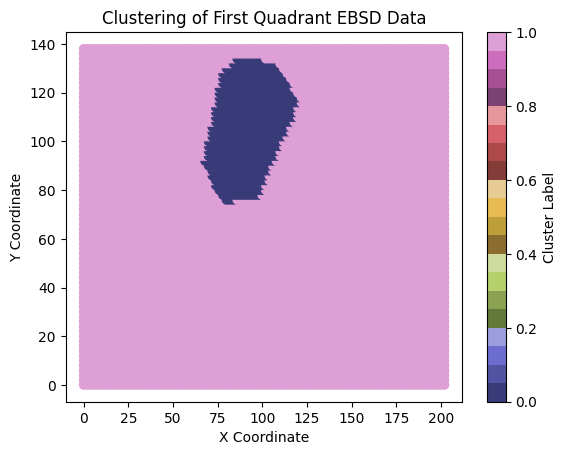

Cluster 0: 548 patterns
Mean pattern for cluster 0: [ 30.84671533  55.89416058 100.85036496 ... 130.64051095 137.71715328
 138.86861314]


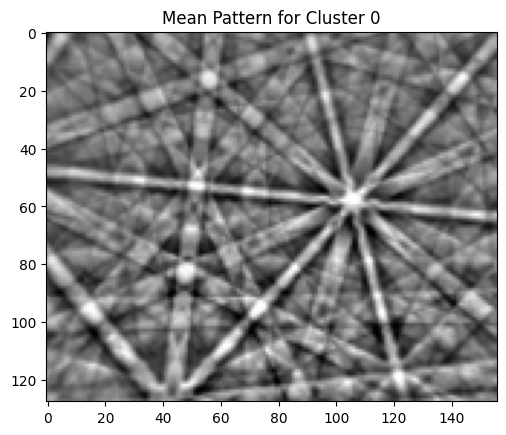

Cluster 1: 6592 patterns
Mean pattern for cluster 1: [111.93416262 113.86331917 114.41504854 ... 104.66004248 105.65351942
 109.50242718]


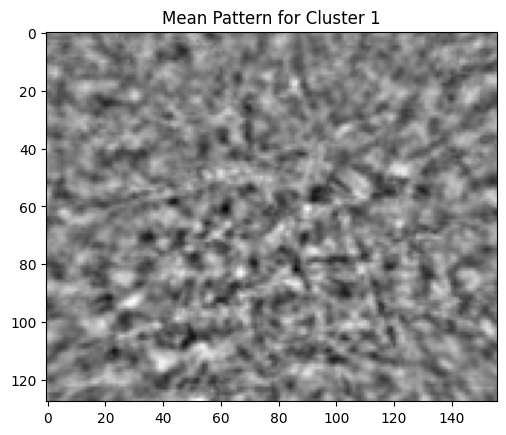

In [2]:
import h5py
import numpy as np
import kikuchipy as kp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Load the EBSD data using h5py
file_path = 'input_data/large Specimen 1 averaging test 25 frames.h5oina'
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)
    X_coords = file['/1/EBSD/Data/X'][:]
    Y_coords = file['/1/EBSD/Data/Y'][:]

# Step 2: Determine the dimensions and split the data into quadrants
max_x = int(np.max(X_coords)) + 1
max_y = int(np.max(Y_coords)) + 1
mid_x = max_x // 2
mid_y = max_y // 2

# Extract the first quadrant
quadrant_1_indices = (X_coords < mid_x) & (Y_coords < mid_y)
quadrant_1 = ebsd_data[quadrant_1_indices]
X_coords_1 = X_coords[quadrant_1_indices]
Y_coords_1 = Y_coords[quadrant_1_indices]

# Step 3: Flatten each image and concatenate them into a single dataset for clustering
num_images_1, img_height, img_width = quadrant_1.shape
flattened_images_1 = quadrant_1.reshape(num_images_1, -1)

# Step 4: Perform clustering (e.g., K-means)
n_clusters = 2 # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_images_1)
labels = kmeans.labels_
centroid = kmeans.cluster_centers_
print("Centroid", centroid)



cmap_custom = plt.get_cmap('tab20b')

# Step 5: Visualize the clustering results
# Create a scatter plot of the coordinates colored by cluster labels
plt.scatter(X_coords_1, Y_coords_1, c=labels, cmap=cmap_custom, marker='o')
plt.colorbar(label='Cluster Label')
plt.title('Clustering of First Quadrant EBSD Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Step 6: Iterate over each cluster and analyze the clusters
for cluster_idx in range(n_clusters):
    cluster_patterns = flattened_images_1[labels == cluster_idx]
    print(f"Cluster {cluster_idx}: {cluster_patterns.shape[0]} patterns")
    # Perform any desired analysis or operations on cluster_patterns
    # For example, you can calculate the mean pattern of the cluster
    mean_pattern = np.mean(cluster_patterns, axis=0)
    print(f"Mean pattern for cluster {cluster_idx}: {mean_pattern}")
    # You can also visualize the mean pattern if needed
    plt.imshow(mean_pattern.reshape(img_height, img_width), cmap='gray')
    plt.title(f'Mean Pattern for Cluster {cluster_idx}')
    plt.show()